<a href="https://colab.research.google.com/github/dxvsh/LearningPytorch/blob/main/Week3/DLP_GA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DLP GA3

In [1]:
!pip install datasets > /dev/null

In [2]:
from datasets import load_dataset, get_dataset_config_info, get_dataset_config_names, get_dataset_split_names
from pprint import pprint
import matplotlib.pyplot as plt

**Q1.** Download the Yelp review dataset `“Yelp/yelp_review_full”`. Split each sample by calling the string method `“.split()”` and choose the correct statements about the dataset.
- [ ] A. The dataset contains close to 99 million words
- [x] B. There are more than 300 samples that contain a single word
- [ ] C. There are less than 300 samples that contain only a single word
- [x] D. “Cheesy-melty-roasted-cauliflower-with-fresh-bread-crumbs-on top.\\nTo-die-for.” is one of the single words in the dataset
- [x] E. The average length of a sample is 134.1
- [x]  F. The distribution of the length of the samples is right skewed

In [4]:
get_dataset_split_names('yelp/yelp_review_full')

['train', 'test']

In [7]:
yelp_review_full = load_dataset('yelp/yelp_review_full', split='all')

In [8]:
yelp_review_full

Dataset({
    features: ['label', 'text'],
    num_rows: 700000
})

This dataset contains reviews from Yelp. There's the review text and the label which denotes the rating of the review. Each review has a rating/label between 0 to 4 (from awful to great)

Let's check a random sample

In [9]:
yelp_review_full[100_000]

{'label': 1,
 'text': "Had the honey hot wings, it wasn't bad, just mediocre. My search for a mom and pop great hot wings. So far no one has come close to Buffalo Wild Wings, but they're a franchise :( anyone knows of great hot wings, please let me know?"}

In [10]:
def count_words(sample):
    sample['word_count'] = len(sample['text'].split())
    return sample

yelp_word_counts = yelp_review_full.map(count_words)

Map:   0%|          | 0/700000 [00:00<?, ? examples/s]

In [11]:
yelp_word_counts[100_000]

{'label': 1,
 'text': "Had the honey hot wings, it wasn't bad, just mediocre. My search for a mom and pop great hot wings. So far no one has come close to Buffalo Wild Wings, but they're a franchise :( anyone knows of great hot wings, please let me know?",
 'word_count': 46}

In [12]:
sum(yelp_word_counts['word_count']) / 10**6

93.878307

So, the entire dataset has close to 94M words not 99. Option A is incorrect.

In [13]:
sum([x for x in yelp_word_counts['word_count'] if x == 1])

355

Option B is correct, there are more than 300 samples that contain just a single word

Option D is correct as well. I saw in the HF DB viewer that there's a sample with the text:

`Cheesy-melty-roasted-cauliflower-with-fresh-bread-crumbs-on-top.\nTo-die-for.`

In [14]:
from statistics import mean
mean(yelp_word_counts['word_count'])

134.11186714285714

Option E is correct as well. The average length of a sample is 134.1

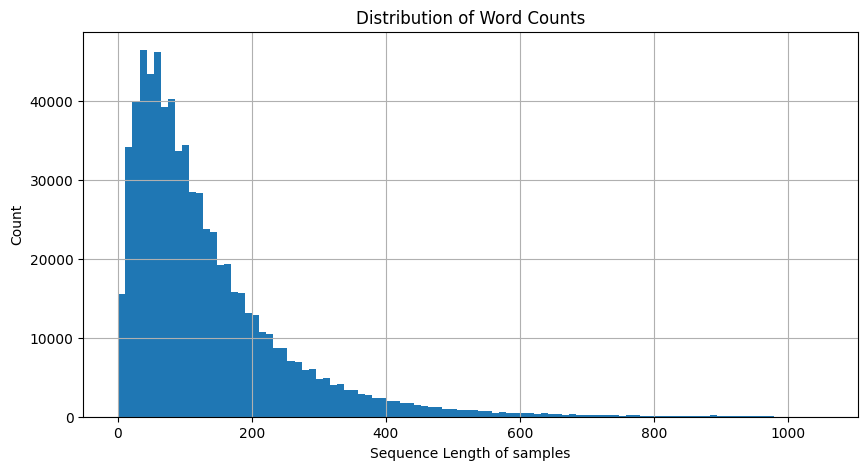

In [15]:
# To check the skewness of the distribution we can make a histogram

plt.figure(figsize=(10, 5))
plt.hist(yelp_word_counts['word_count'], bins=100)
plt.xlabel('Sequence Length of samples')
plt.ylabel('Count')
plt.title('Distribution of Word Counts')
plt.grid()
plt.show()

So, option F is correct. The distribution of the length of the samples is indeed skewed to the right.

**Q2.** Load the “bert-base-uncased” pre-trained tokenizer and choose the correct statements about the tokenizer.
- [x] A. The tokenizer is used for the BERT model with the context length of 512
- [x] B. The tokenizer has 5 special tokens
- [ ] C. Tokenizing a sample that contains more than 512 words would result in truncation of all tokens beyond the length 512
- [ ] D. Tokenizer inserts all the special tokens when it processes a single sample as an input
- [x] E. Tokenizer inserts `[CLS]` and `[SEP]` special tokens when it processes a single sample as an input
- [ ] F. Tokenizer inserts only `[CLS]` special token when it processes a single sample as an input

In [16]:
from transformers import AutoTokenizer

bert_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [17]:
bert_tokenizer.model_max_length

512

So, the context length of the model is 512 tokens. Option A is correct.

In [18]:
bert_tokenizer.special_tokens_map

{'unk_token': '[UNK]',
 'sep_token': '[SEP]',
 'pad_token': '[PAD]',
 'cls_token': '[CLS]',
 'mask_token': '[MASK]'}

The bert tokenizer has 5 special tokens. `UNK`, `SEP`, `PAD`, `CLS` and `MASK`. Option B is also correct.

In [19]:
text = "After a morning of Thrift Store hunting, a friend and I were thinking of lunch, and he suggested Emil's after he'd seen Chris Sebak do a bit on it and had tried it a time or two before, and I had not. He said they had a decent Reuben, but to be prepared to step back in time.\n\nWell, seeing as how I'm kind of addicted to late 40's and early 50's, and the whole Rat Pack scene, stepping back in time is a welcomed change in da burgh...as long as it doesn't involve 1979, which I can see all around me every day.\n\nAnd yet another shot at finding a decent Reuben in da burgh...well, that's like hunting the Holy Grail. So looking under one more bush certainly wouldn't hurt.\n\nSo off we go right at lunchtime in the middle of...where exactly were we? At first I thought we were lost, driving around a handful of very rather dismal looking blocks in what looked like a neighborhood that had been blighted by the building of a highway. And then...AHA! Here it is! And yep, there it was. This little unassuming building with an add-on entrance with what looked like a very old hand painted sign stating quite simply 'Emil's. \n\nWe walked in the front door, and entered another world. Another time, and another place. Oh, and any Big Burrito/Sousa foodies might as well stop reading now. I wouldn't want to see you walk in, roll your eyes and say 'Reaaaaaalllly?'\n\nThis is about as old world bar/lounge/restaurant as it gets. Plain, with a dark wood bar on one side, plain white walls with no yinzer pics, good sturdy chairs and actual white linens on the tables. This is the kind of neighborhood dive that I could see Frank and Dino pulling a few tables together for some poker, a fish sammich, and some cheap scotch. And THAT is exactly what I love.\n\nOh...but good food counts too. \n\nWe each had a Reuben, and my friend had a side of fries. The Reubens were decent, but not NY awesome. A little too thick on the bread, but overall, tasty and definitely filling. Not too skimpy on the meat. I seriously CRAVE a true, good NY Reuben, but since I can't afford to travel right now, what I find in da burgh will have to do. But as we sat and ate, burgers came out to an adjoining table. Those were some big thick burgers. A steak went past for the table behind us. That was HUGE! And when we asked about it, the waitress said 'Yeah, it's huge and really good, and he only charges $12.99 for it, ain't that nuts?' Another table of five came in, and wham. Fish sandwiches PILED with breaded fish that looked amazing. Yeah, I want that, that, that and THAT!\n\nMy friend also mentioned that they have a Chicken Parm special one day of the week that is only served UNTIL 4 pm, and that it is fantastic. If only I could GET there on that week day before 4...\n\nThe waitress did a good job, especially since there was quite a growing crowd at lunchtime on a Saturday, and only one of her. She kept up and was very friendly. \n\nThey only have Pepsi products, so I had a brewed iced tea, which was very fresh, and she did pop by to ask about refills as often as she could. As the lunch hour went on, they were getting busy.\n\nEmil's is no frills, good portions, very reasonable prices, VERY comfortable neighborhood hole in the wall...kind of like Cheers, but in a blue collar neighborhood in the 1950's. Fan-freakin-tastic! I could feel at home here.\n\nYou definitely want to hit Mapquest or plug in your GPS though. I am not sure that I could find it again on my own...it really is a hidden gem. I will be making my friend take me back until I can memorize where the heck it is.\n\nAddendum: 2nd visit for the fish sandwich. Excellent. Truly. A pound of fish on a fish-shaped bun (as opposed to da burgh's seemingly popular hamburger bun). The fish was flavorful, the batter excellent, and for just $8. This may have been the best fish sandwich I've yet to have in da burgh."
print(len(text.split()))

output = bert_tokenizer.encode(text)
len(output)

Token indices sequence length is longer than the specified maximum sequence length for this model (966 > 512). Running this sequence through the model will result in indexing errors


722


966

In [20]:
# pprint(output, compact=True)

The above sample text has 722 whitespace separated words but still it got properly tokenized (into 966 tokens) so its not like if the sample is greater than 512 words it'll get truncated after 512 words. But I think if we passed this tokenized result to the BERT model, then it will truncated it at 512 tokens and will not process any further tokens.

so C is incorrect.

In [21]:
sample = yelp_review_full[100_000]['text']
sample

"Had the honey hot wings, it wasn't bad, just mediocre. My search for a mom and pop great hot wings. So far no one has come close to Buffalo Wild Wings, but they're a franchise :( anyone knows of great hot wings, please let me know?"

In [22]:
tokenized_text = bert_tokenizer.encode(sample)

bert_tokenizer.decode(tokenized_text)

"[CLS] had the honey hot wings, it wasn't bad, just mediocre. my search for a mom and pop great hot wings. so far no one has come close to buffalo wild wings, but they're a franchise : ( anyone knows of great hot wings, please let me know? [SEP]"

As we can see, the tokenizer added the `CLS` and `SEP` special tokens when it processes a single sample as input.

E is correct. D and F are incorrect.

**Q3.** Use “BertConfig” and “BertForMaskedLM” to construct the default (original) BERT model. Choose the correct statements
- [x] A. The model has 12 Bert layers
- [ ] B. The model has 6 Bert layers
- [x] C. The model uses absolute position embeddings
- [x] D. The word embedding (token embedding) layer has about 23 million learnable parameters
- [x] E. The total number of parameters in the model is close to 110 million

In [23]:
from transformers import BertConfig, BertForMaskedLM

bert_config = BertConfig()
bert_model = BertForMaskedLM(bert_config)

In [24]:
bert_config

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [25]:
bert_config.num_hidden_layers

12

So option A. is correct. There are 12 Bert/Hidden Layers

In [26]:
bert_config.position_embedding_type

'absolute'

I don't know what "position_embedding" is but this also seems to be correct. Option C is correct.

In [27]:
# Let's find how many learnable parameters does the word embedding (token embedding) layer has
bert_model.get_input_embeddings()

Embedding(30522, 768, padding_idx=0)

In [28]:
# Embedding dimensions are 30522x768

(30522*768)/10**6

23.440896

Option D. is also correct. The word embedding layer has about 23 million parameters.

In [29]:
bert_model.num_parameters()

109514298

Option E is also correct. The total number of parameters in the model is close to 110M

**Q4.** Double the context length from 512 to 1024 (you can change it in the configuration). Count the number of parameters and enter the change in the number of parameters (in millions) compared to the default configuration.

A. To hange the context length, we'll need to use the `max_position_embeddings` param.

According to the docs:

> `max_position_embeddings` : The maximum sequence length that this model might ever be used with. Typically set this to something large just in case (e.g., 512 or 1024 or 2048). The default is 512.

In [30]:
bert_config = BertConfig(max_position_embeddings=1024)
bert_model = BertForMaskedLM(bert_config)

In [31]:
bert_model.num_parameters()

109907514

By increasing the context length, the model parameters have increased from 109514298 to 109907514.

Roughly an increase of **0.4** Million over the default config.

In [32]:
# change : Num params in the new config - Num params in the old config
(109907514 - 109514298)/10**6

0.393216

In [33]:
yelp_review_full

Dataset({
    features: ['label', 'text'],
    num_rows: 700000
})

**Q5.** Pack (chunk) the samples such that the length of all the samples in the dataset is 512 (for efficient training). Define a mapping function that implements the following procedure

 1. Take a batch of 1000 samples
 2. Tokenize it to get input IDs and attention mask
 3. Concatenate all the input IDs
 4. Chunk the concatenated IDs into a size of 512
 5. Drop the last chunk if its length is less than 512
 6. Pack all the chunks
 7. Iterate over all the batches in the dataset

Store the resulting dataset in the variable `ds_chunked`. Enter the total number of samples in the new dataset.

**Note**: the batch size should be kept at 1000 while calling `ds.map()` for the answer to match.

In [34]:
sample = yelp_review_full[100_000]['text']
sample

"Had the honey hot wings, it wasn't bad, just mediocre. My search for a mom and pop great hot wings. So far no one has come close to Buffalo Wild Wings, but they're a franchise :( anyone knows of great hot wings, please let me know?"

Using the bert tokenizer on tokenize our sample gives us the token ids and attention mask like so:

In [35]:
bert_tokenizer(sample)

{'input_ids': [101, 2018, 1996, 6861, 2980, 4777, 1010, 2009, 2347, 1005, 1056, 2919, 1010, 2074, 19960, 3695, 16748, 1012, 2026, 3945, 2005, 1037, 3566, 1998, 3769, 2307, 2980, 4777, 1012, 2061, 2521, 2053, 2028, 2038, 2272, 2485, 2000, 6901, 3748, 4777, 1010, 2021, 2027, 1005, 2128, 1037, 6329, 1024, 1006, 3087, 4282, 1997, 2307, 2980, 4777, 1010, 3531, 2292, 2033, 2113, 1029, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

And if we pass the tokenizer a bunch of samples, it will also return us the token ids, attention masks for all the samples as a neat list of lists.

In [36]:
# samples = yelp_review_full[:3]
# bert_tokenizer(samples['text'])

In [37]:
def chunk_and_pack(examples):
  """
  First concatenates all the tokens and then chunks them into a size of 512.
  This makes sure that each sample in the dataset has a length of 512.
  """

  tokenized_inputs = bert_tokenizer(examples['text'])

  # concatenate all the input_ids into one list
  all_input_ids = sum(tokenized_inputs['input_ids'], [])

  # chunking the concatenated ids into a size of 512
  chunked_input_ids = [all_input_ids[i:i+512] for i in range(0, len(all_input_ids), 512)]

  # Drop the last chunk if its length is less than 512
  if len(chunked_input_ids[-1]) < 512:
      chunked_input_ids = chunked_input_ids[:-1]

  # create the attention mask
  attention_masks = [[1] * 512 for chunk in chunked_input_ids]

  packed_examples = {'input_ids': chunked_input_ids, 'attention_mask': attention_masks}
  return packed_examples

# Apply the chunk_and_pack function to the dataset in batches of 1000
# Also make sure to remove all the columns in the dataset (in this case, label and text)
# This is because the map function expects that number of samples should remain the same
# after a map operation. If 1000 samples went in, 1000 should come out. But in this
# case, that is not possible. We will always get a lower number of samples back after
# concatenation. And map will give an error : "Column named input_ids expected length 1000 but got length 368"
# or something like that. So we remove the columns in the dataset so that it doesn't expect any specific
# number of columns.
ds_chunked = yelp_review_full.map(chunk_and_pack, batched=True, batch_size=1000, remove_columns=['label', 'text'])

Map:   0%|          | 0/700000 [00:00<?, ? examples/s]

In [38]:
ds_chunked

Dataset({
    features: ['input_ids', 'attention_mask'],
    num_rows: 246695
})

So the total number of samples in this new dataset is **246695**.

We've gone from 700,000 samples of variable length to 246,695 samples each of length 512 words.

Let's also check out a sample for good measure.

In [40]:
# pprint(ds_chunked[1], compact=True)

**Q6.** Split the new dataset into training and test sets with the `test_size=0.05` and `seed=42`. Use the appropriate data collator function for the MLM objective and set the masking probability to 0.2. Use the data loader from PyTorch to load a batch of samples, and enter the token ID corresponding to the unmasked token.

> According to the instructors: we need to report the `label_id` of the unmasked token, *not* the token_id! The question statement had a mistake.


**What is MLM?**

Masked language modeling (MLM)
A pretraining task where the model sees a corrupted version of the texts, usually done by masking some tokens randomly, and has to predict the original text.

In [41]:
# Split the dataset into training and test sets
train_test_splits = ds_chunked.train_test_split(test_size=0.05, seed=42)
train_dataset = train_test_splits['train']
test_dataset = train_test_splits['test']

In [44]:
from transformers import DataCollatorForLanguageModeling

# Data collator for MLM
data_collator = DataCollatorForLanguageModeling(
    tokenizer=bert_tokenizer, mlm_probability=0.2
)

Lets try using this collator and see how this masking thing works:

Observe how it randomly masks tokens, and also note that it masks different tokens each time you re-run the cell!

In [59]:
samples = [train_dataset[0], train_dataset[1]]
print(samples)

for chunk in data_collator(samples)["input_ids"]:
    print(f"\n'>>> {bert_tokenizer.decode(chunk)}'")

[{'input_ids': [1010, 1045, 2052, 2031, 2056, 2009, 2001, 3294, 4276, 2009, 1010, 2021, 1996, 2833, 2347, 1005, 1056, 2130, 1032, 1000, 2307, 1012, 1032, 1000, 2054, 1037, 5949, 1010, 2021, 1045, 3984, 2008, 1005, 1055, 1996, 3891, 2017, 2202, 2005, 5782, 2000, 3046, 1037, 2367, 11281, 4825, 1012, 2074, 2138, 2009, 3504, 1998, 3849, 11281, 5121, 2515, 2025, 11302, 1037, 2307, 20560, 3325, 1012, 1032, 1050, 1032, 17953, 14083, 2021, 2025, 2560, 1010, 1996, 2326, 2001, 2035, 2058, 1996, 2173, 1012, 2748, 1996, 4825, 2001, 2200, 5697, 1010, 2021, 2256, 14903, 6051, 2066, 2027, 2020, 2770, 2105, 2007, 2037, 4641, 3013, 2125, 1012, 2005, 1037, 2986, 7759, 4825, 1998, 2008, 3976, 6415, 1010, 1045, 3517, 2062, 1012, 102, 101, 26114, 10166, 999, 11112, 3022, 2020, 12090, 999, 999, 1032, 1050, 1032, 1050, 17048, 2000, 5254, 2256, 2283, 2288, 2000, 2022, 4658, 1998, 4133, 2006, 1996, 29379, 3366, 7384, 2795, 1012, 2061, 1999, 2090, 7807, 1997, 2893, 2256, 2833, 2366, 2000, 2149, 1010, 2057, 2020

In [70]:
bert_tokenizer.mask_token_id

103

The token ID of the `[MASK]` token is 103 for bert. So the `MASK` token always has an ID of 103.

What we need to do is to use the dataloader to load a batch of samples and report the `label_id` of the unmasked tokens.

In [72]:
# PyTorch DataLoader
from torch.utils.data import DataLoader

# lets create a dataloader with a batch size of 1
dataloader = DataLoader(
    train_dataset, batch_size=1, collate_fn=data_collator
)

Now, lets use this dataloader to load a batch of samples.

In [66]:
dataloader_iter = iter(dataloader)
batch = next(dataloader_iter)
print(batch)

{'input_ids': tensor([[ 1010,  1045,  2052,  2031,  2056,  2009,  2001,  3294,  4276,  2009,
          1010,  2021,  1996,   103,  2347,  1005,   103,  2130,  1032,  1000,
          2307,  9338,  1032,  1000,  2054,   103,  5949,   103,  2021,  1045,
          3984,   103,  1005,  1055,  1996,   103,  2017,  2202,  2005,  5782,
          2000,  3046,   103,  2367, 11281,  4825,  1012,  2074,  2138,  2009,
          3504,  1998,  3849, 11281,  5121,  2515,   103, 11302,  1037,  2307,
         20560,  3325,  1012,  1032,  1050,  1032, 17953,   103,  2021,   103,
          2560,  1010,  1996,   103,  2001,  2035,  2058,  1996,   103,  1012,
          2748,  1996,  4825,  2001,  2200,  5697,  1010,  2021,  2256, 14903,
          6051,  2066,  2027,  2020,  2770,  2105,  2007,  2037,  4641,   103,
          2125,  1012,  2005,  1037,  2986,  7759,  4825,   103,  2008,  3976,
          6415,  1010,  1045,  3517,  2062,  1012,   102,   101, 26114, 10166,
           999,   103,  3022,  2020, 1

The HF docs say that all the unmasked tokens get a `label_id` of -100. Only the masked tokens have a different `label_id` (different random numbers). Do note that although the `label_id` is different for the mask token, all the mask tokens have the same `token_id` which is 103.

We can see that in the above output as well in the labels column. Roughly all of the numbers are -100 (unmasked) and about 20% of the times, there are masked tokens occuring, just as we specified in the collator.

So the answer is **-100** (label_id of the unmasked tokens)

**Q7.** Create a small BERT model by changing the following hyper-parameters and keeping the other hyper-parameters as is
 - num_hidden_layers = 6
 - hidden size: 384
 - intermediate_size: 1536

and start training the model with a batch of size 8 for an epoch.

What is the loss value at the end of the training?

**Note**: You may optionally save the checkpoints for every N-th step.



In [ ]:
from transformers import TrainingArguments, Trainer

In [ ]:
bert_config = BertConfig(
    num_hidden_layers=6,
    hidden_size=384,
    intermediate_size=1536
)

bert_model = BertForMaskedLM(bert_config)

In [ ]:
training_args = TrainingArguments(
    output_dir='out',
    save_steps=1000,
    num_train_epochs=1,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
)

trainer = Trainer(
    model=bert_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator)

results = trainer.train()

Step,Training Loss
500,5.860700
1000,5.841600
1500,5.831000
2000,5.821500
2500,5.819600
3000,5.814700
3500,5.805900
4000,5.795500
4500,5.789300
5000,5.794100


In [ ]:
results

TrainOutput(global_step=29295, training_loss=5.773834108716291, metrics={'train_runtime': 7198.2966, 'train_samples_per_second': 32.558, 'train_steps_per_second': 4.07, 'total_flos': 7794712146493440.0, 'train_loss': 5.773834108716291, 'epoch': 1.0})

In [ ]:
!zip -r /content/checkpoint-29295.zip /content/out/checkpoint-29295/

  adding: content/out/checkpoint-29295/ (stored 0%)
  adding: content/out/checkpoint-29295/scheduler.pt (deflated 56%)
  adding: content/out/checkpoint-29295/training_args.bin (deflated 52%)
  adding: content/out/checkpoint-29295/optimizer.pt (deflated 8%)
  adding: content/out/checkpoint-29295/config.json (deflated 47%)
  adding: content/out/checkpoint-29295/rng_state.pth (deflated 25%)
  adding: content/out/checkpoint-29295/model.safetensors (deflated 7%)
  adding: content/out/checkpoint-29295/generation_config.json (deflated 8%)
  adding: content/out/checkpoint-29295/trainer_state.json (deflated 75%)


Load back the saved model checkpoints:

In [106]:
!unzip checkpoint-29295.zip

Archive:  checkpoint-29295.zip
   creating: checkpoint-29295/
  inflating: checkpoint-29295/scheduler.pt  
  inflating: checkpoint-29295/training_args.bin  
  inflating: checkpoint-29295/optimizer.pt  
  inflating: checkpoint-29295/config.json  
  inflating: checkpoint-29295/rng_state.pth  
  inflating: checkpoint-29295/model.safetensors  
  inflating: checkpoint-29295/generation_config.json  
  inflating: checkpoint-29295/trainer_state.json  


**Q8.** Test whether the model can fill in the blank (masked words) with suitable words.

In [109]:
model = BertForMaskedLM.from_pretrained('/content/checkpoint-29295')

text = "This is really a [MASK] experience for all of [MASK]"
inputs = bert_tokenizer(text, return_tensors="pt")
token_logits = model(**inputs).logits

# Find the location of [MASK] and extract its logits
mask_token_index =   torch.where(inputs["input_ids"] == bert_tokenizer.mask_token_id)[1]
mask_token_logits = token_logits[0, mask_token_index, :]

# Pick the [MASK] candidates with the highest logits
top_5_tokens =   torch.topk(mask_token_logits, 5, dim=1).indices[0].tolist()

for token in top_5_tokens:
    print(f"'>>> {text.replace(bert_tokenizer.mask_token, bert_tokenizer.decode([token]))}'")

'>>> This is really a . experience for all of .'
'>>> This is really a the experience for all of the'
'>>> This is really a and experience for all of and'
'>>> This is really a i experience for all of i'
'>>> This is really a a experience for all of a'


In [112]:
for token in top_5_tokens:
    print(bert_tokenizer.decode(token))

.
the
and
i
a


As you can see, the trained model is pretty awful at predicting the masked word!

The original bert model works much better, though i can't get it to work correctly when there are multiple masked tokens in a sample.

In [125]:
from transformers import pipeline

unmasker = pipeline('fill-mask', model='google-bert/bert-base-uncased', top_k=5)
unmasker("This is really a [MASK] experience")

Some weights of the model checkpoint at google-bert/bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'score': 0.17383423447608948,
  'token': 2307,
  'token_str': 'great',
  'sequence': 'this is really a great experience'},
 {'score': 0.10434883832931519,
  'token': 2204,
  'token_str': 'good',
  'sequence': 'this is really a good experience'},
 {'score': 0.07174485921859741,
  'token': 6919,
  'token_str': 'wonderful',
  'sequence': 'this is really a wonderful experience'},
 {'score': 0.050753720104694366,
  'token': 2047,
  'token_str': 'new',
  'sequence': 'this is really a new experience'},
 {'score': 0.04450811818242073,
  'token': 4310,
  'token_str': 'unique',
  'sequence': 'this is really a unique experience'}]

Can't get it to work right with multiple masked tokens for some reason. It just predicts for the first masked token, not the second one.

In [130]:
unmasker("This is really a [MASK] experience for all of [MASK]", top_k = 4)

[[{'score': 0.22067567706108093,
   'token': 2307,
   'token_str': 'great',
   'sequence': '[CLS] this is really a great experience for all of [MASK] [SEP]'},
  {'score': 0.18271343410015106,
   'token': 2047,
   'token_str': 'new',
   'sequence': '[CLS] this is really a new experience for all of [MASK] [SEP]'},
  {'score': 0.10692112892866135,
   'token': 2204,
   'token_str': 'good',
   'sequence': '[CLS] this is really a good experience for all of [MASK] [SEP]'},
  {'score': 0.09378966689109802,
   'token': 6919,
   'token_str': 'wonderful',
   'sequence': '[CLS] this is really a wonderful experience for all of [MASK] [SEP]'}],
 [{'score': 0.9546255469322205,
   'token': 1012,
   'token_str': '.',
   'sequence': '[CLS] this is really a [MASK] experience for all of. [SEP]'},
  {'score': 0.02276822179555893,
   'token': 1025,
   'token_str': ';',
   'sequence': '[CLS] this is really a [MASK] experience for all of ; [SEP]'},
  {'score': 0.02020999975502491,
   'token': 999,
   'token_s